In [3]:
import numpy as np
import scipy

from FlagRep import FlagRep, chordal_distance

from matplotlib import pyplot as plt

from sklearn.manifold import MDS

In [4]:
## Small example

n=10 # n samples
p=4 # p features

# the feature hierarchy 
A1 = np.array([0])
A2 = np.array([0,1,2])
A3 = np.array([0,1,2,3])

# make a list the feature hierarchy
# this stores indices of the features
Aset = [A1, A2, A3]

# number of trials
n_trials = 1000



seed = 1
    
#set random seed
np.random.seed(seed)
    
# randomly generate a data matrix
D = np.zeros((n,p))
D[:,0] = np.random.normal(0,1,n) #d_1
D[:,1] = np.random.normal(0,2,n) #d_2
D[:,2] = 2*D[:,1]                #d_3
D[:,3] = np.random.normal(0,3,n) #d_4

FlagRep(D, Aset)

[3.77845963]


(array([[ 0.42989618, -0.23026975, -0.37209191],
        [-0.1619063 ,  0.71210966,  0.32908144],
        [-0.13978494,  0.01148532,  0.35686654],
        [-0.28396985, -0.0889147 ,  0.19645759],
        [ 0.22903715, -0.26967563,  0.44221216],
        [-0.60912089, -0.07633973, -0.32644602],
        [ 0.46177859,  0.47477257, -0.09226054],
        [-0.20145958,  0.18773793, -0.43926197],
        [ 0.08443629,  0.05626051, -0.11269339],
        [-0.06599789, -0.29910778,  0.26649994]]),
 array([1, 2, 3]))

In [73]:
# grass pasture = 5
# corn notill = 2
# data from https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines


data = scipy.io.loadmat('../data/Indian_pines.mat')
labels = scipy.io.loadmat('../data/Indian_pines_gt.mat')

In [74]:
classes = [2,3,4,5,6,8,10,11,12,13,14,15]

[4.35826555e+05 1.62015218e+04 7.32969038e+03 5.65247067e+03
 3.86245011e+03 3.26551054e+03 2.72619303e+03 2.07962890e+03
 1.82515147e+03 1.56687930e+03 1.24459890e+03 1.14678218e+03
 1.11829994e+03 1.06066939e+03 1.00857214e+03 9.24769780e+02
 8.64798440e+02 7.96025078e+02 7.43312442e+02 6.70622908e+02
 6.36552124e+02 5.85832776e+02 5.54364669e+02 5.24886050e+02
 5.18761980e+02 4.80210323e+02 4.67264537e+02 4.39781548e+02
 4.20700709e+02 4.04794308e+02 3.91625895e+02 3.61229074e+02
 3.51654911e+02 3.26516130e+02 3.11554288e+02 2.86083843e+02
 2.66359249e+02 2.49743045e+02 2.27227240e+02 2.13706559e+02]
[4.18563974e+05 1.26622269e+04 5.88153195e+03 3.94185887e+03
 3.76065180e+03 2.68663573e+03 2.35868340e+03 2.05673114e+03
 1.82139778e+03 1.59868359e+03 1.45796969e+03 1.23924801e+03
 1.08685341e+03 1.00692471e+03 9.27183637e+02 8.19431936e+02
 7.86836686e+02 7.63405813e+02 6.22374463e+02 5.89110694e+02
 5.67909301e+02 5.43935988e+02 5.08212886e+02 4.94593955e+02
 4.90194692e+02 4.66156

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


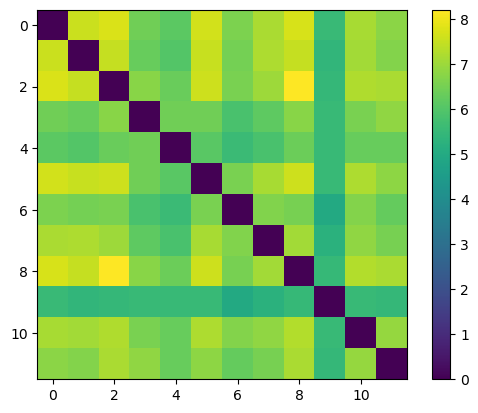

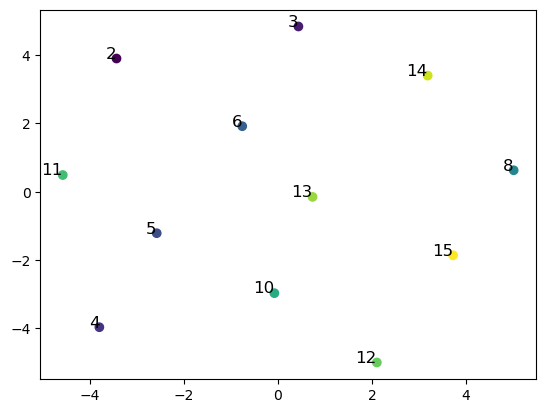

In [86]:
Aset = [np.arange(40),np.arange(220)]
np.random.seed = 420

n_samples = 200

Xs = []
fl_types = []

for c in classes:
    idx = (labels['indian_pines_gt'] == c)
    sel_data = data['indian_pines'][idx]
    x = sel_data[np.random.choice(len(sel_data), size = n_samples),:]
    X, fl_type = FlagRep(x, Aset, eps_rank=1000)
    Xs.append(X)
    fl_types.append(fl_type)

p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist

plt.figure()
plt.imshow(dist_mat)
plt.colorbar()


mds = MDS(n_components=2, dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.figure()
plt.scatter(vis_data[:,0], vis_data[:,1],c = classes)

# Add labels to the points
for i in range(len(classes)):
    plt.text(vis_data[:,0][i], vis_data[:,1][i], classes[i], fontsize=12, ha='right')




In [83]:
fl_types

[array([13, 34]),
 array([13, 31]),
 array([20, 41]),
 array([20, 31]),
 array([17, 25]),
 array([14, 31]),
 array([11, 26]),
 array([15, 32]),
 array([18, 40]),
 array([16, 22]),
 array([16, 31]),
 array([25, 39])]

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


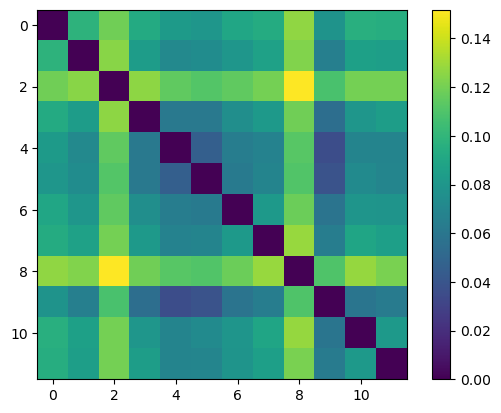

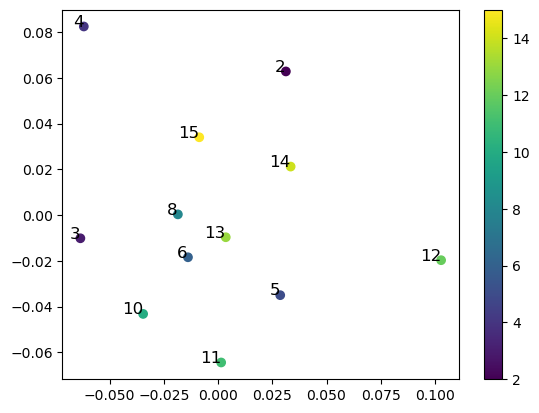

In [87]:
max_dim = np.max(np.vstack(fl_types))
fl_type = list(np.arange(1,max_dim+1))

np.random.seed = 420

n_samples = 200

Xs = []
fl_types = []

for c in classes:
    idx = (labels['indian_pines_gt'] == c)
    sel_data = data['indian_pines'][idx]
    x = sel_data[np.random.choice(len(sel_data), size = n_samples),:]
    U,_,_ = np.linalg.svd(x)
    X = U[:,:max_dim]
    Xs.append(X)
    fl_types.append(fl_type)

p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist

plt.figure()
plt.imshow(dist_mat)
plt.colorbar()


mds = MDS(n_components=2, dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.figure()
plt.scatter(vis_data[:,0], vis_data[:,1], c = classes)
plt.colorbar()

# Add labels to the points
for i in range(len(classes)):
    plt.text(vis_data[:,0][i], vis_data[:,1][i], classes[i], fontsize=12, ha='right')

Separate between two classes

In [ ]:
# grass pasture = 5
# corn notill = 2
# data from https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines


data = scipy.io.loadmat('../data/Indian_pines.mat')
labels = scipy.io.loadmat('../data/Indian_pines_gt.mat')

In [34]:
class1 = 5
class2 = 2

In [35]:
idx = (labels['indian_pines_gt'] == class1) |  (labels['indian_pines_gt'] == class2)

In [36]:
sel_data = data['indian_pines'][idx]
sel_labels = labels['indian_pines_gt'][idx]

In [37]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# sel_data = ss.fit_transform(sel_data)

In [48]:
np.random.seed = 420

Aset = [np.arange(40),np.arange(220)]

Xs = []
fl_types = []
k=50
for id in [class1,class2]:
    idx = sel_labels == id
    for i in range(30):
        x_sel = sel_data[idx]
        x = x_sel[np.random.choice(len(x_sel), size = k),:]
        X, fl_type = FlagRep(x,Aset, eps_rank=1000)
        Xs.append(X)
        fl_types.append(fl_type)


[1.75473423e+05 1.58672758e+04 3.87333631e+03 2.56001679e+03
 2.49057647e+03 2.15324602e+03 1.67987332e+03 1.38565812e+03
 1.10382242e+03 1.07962038e+03 9.44930857e+02 8.54105455e+02
 6.95860056e+02 6.70680912e+02 6.09096043e+02 5.06313997e+02
 4.93868349e+02 3.85651425e+02 3.38754495e+02 2.87332035e+02
 2.73838725e+02 2.68427923e+02 2.56049434e+02 2.46118030e+02
 2.14690513e+02 2.05394613e+02 1.81646370e+02 1.57677991e+02
 1.45374471e+02 1.32559209e+02 1.22549347e+02 1.06678958e+02
 8.27471270e+01 7.96561468e+01 6.80642785e+01 5.13216821e+01
 4.70897960e+01 4.00213680e+01 2.08196634e+01 1.92689012e+01]
[1.73995912e+05 1.53621339e+04 3.18718000e+03 2.18721125e+03
 2.09301046e+03 1.89431461e+03 1.71822258e+03 1.64109105e+03
 1.27783891e+03 1.04163615e+03 9.81930845e+02 8.87325226e+02
 6.97659972e+02 6.29497507e+02 5.39072393e+02 4.69007634e+02
 4.43126007e+02 3.49946607e+02 3.25172686e+02 3.21762198e+02
 3.08063622e+02 2.70006892e+02 2.50195577e+02 2.39017049e+02
 2.20639855e+02 1.96899

In [49]:
max_dim = np.max(np.vstack(fl_types))

In [50]:
fl_types

[array([10, 15]),
 array([10, 15]),
 array([11, 16]),
 array([11, 17]),
 array([10, 15]),
 array([10, 15]),
 array([11, 17]),
 array([ 9, 14]),
 array([11, 17]),
 array([10, 16]),
 array([11, 17]),
 array([10, 16]),
 array([12, 17]),
 array([ 8, 13]),
 array([ 9, 15]),
 array([ 9, 14]),
 array([ 9, 15]),
 array([12, 18]),
 array([11, 17]),
 array([ 9, 14]),
 array([10, 17]),
 array([10, 16]),
 array([11, 17]),
 array([11, 17]),
 array([ 9, 14]),
 array([11, 17]),
 array([ 9, 13]),
 array([10, 16]),
 array([10, 15]),
 array([11, 15]),
 array([ 6, 16]),
 array([ 6, 16]),
 array([ 7, 20]),
 array([ 8, 18]),
 array([ 8, 18]),
 array([ 6, 16]),
 array([ 7, 18]),
 array([ 7, 17]),
 array([ 7, 17]),
 array([ 7, 17]),
 array([ 6, 16]),
 array([ 7, 16]),
 array([ 6, 16]),
 array([ 7, 17]),
 array([ 5, 14]),
 array([ 8, 17]),
 array([ 7, 17]),
 array([ 8, 17]),
 array([ 7, 15]),
 array([ 6, 16]),
 array([ 8, 18]),
 array([ 8, 16]),
 array([ 7, 17]),
 array([ 7, 18]),
 array([ 7, 15]),
 array([ 7

In [51]:
p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist
        

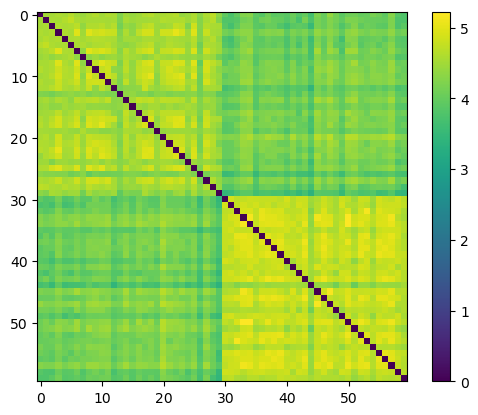

In [52]:
plt.imshow(dist_mat)
plt.colorbar()

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


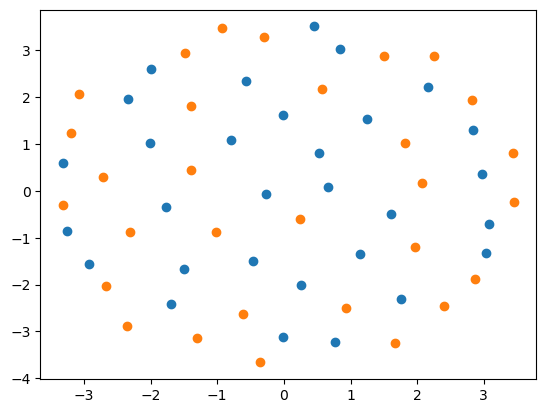

In [53]:

mds = MDS(n_components=2,dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.scatter(vis_data[:p//2,0],vis_data[:p//2,1], color = 'tab:blue')
plt.scatter(vis_data[p//2:,0],vis_data[p//2:,1], color = 'tab:orange')

In [54]:
n_sing_vals = max_dim

np.random.seed = 420

Xs = []
fl_types = []
k=100
for id in [class1,class2]:
    idx = sel_labels == id
    for i in range(30):
        x_sel = sel_data[idx]
        x = x_sel[np.random.choice(len(x_sel), size = k),:]
        U,_,_ = np.linalg.svd(x, full_matrices=False)
        Xs.append(U[:,:n_sing_vals])
        fl_types.append(list(np.arange(1,n_sing_vals+1)))

In [55]:
p = len(fl_types)
dist_mat = np.zeros((p,p))
for i in range(p):
    for j in range(i+1,p):
        x = Xs[i]
        y = Xs[j]
        fl_type_x = fl_types[i]
        fl_type_y = fl_types[j]
        Bs_x = [np.arange(fl_type_x[0]),np.arange(fl_type_x[0]+1,fl_type_x[1])]
        Bs_y = [np.arange(fl_type_y[0]),np.arange(fl_type_y[0]+1,fl_type_y[1])]
        dist = chordal_distance(x, y, Bs_x, Bs_y)
        dist_mat[i,j] = dist
        dist_mat[j,i] = dist
        

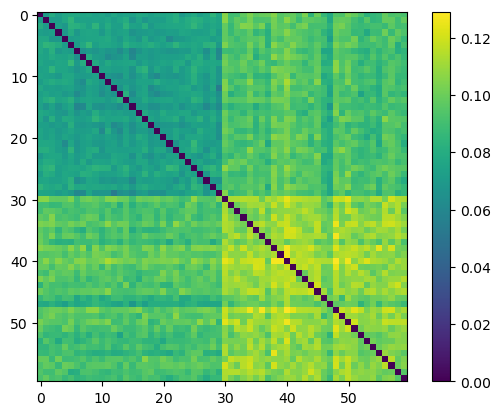

In [56]:
plt.imshow(dist_mat)
plt.colorbar()

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


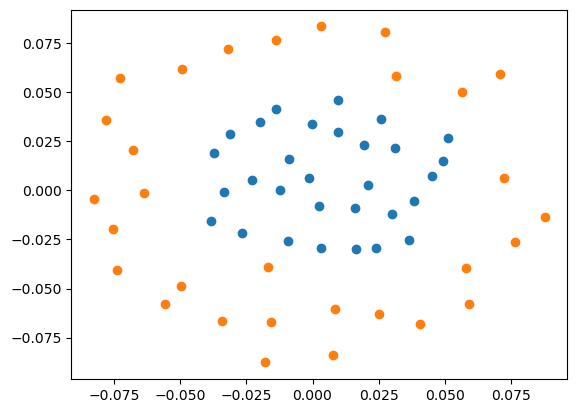

In [57]:

mds = MDS(n_components=2,dissimilarity='precomputed')
vis_data = mds.fit_transform(dist_mat)

plt.scatter(vis_data[:p//2,0],vis_data[:p//2,1], color = 'tab:blue')
plt.scatter(vis_data[p//2:,0],vis_data[p//2:,1], color = 'tab:orange')